In [33]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from matplotlib import rc
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib
# matplotlib.rcParams["font.family"]="Malgun Gothic"
# matplotlib.rcParams["axes.unicode_minus"]= False
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [69]:
x_data = titanic[['pclass', 'sex', 'fare']]
x_data = pd.get_dummies(x_data, columns=['sex'])
x_data = x_data.drop('sex_male', axis=1)
x_data

,pclass,fare,sex_female
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0
...,...,...,...
886,2,13.0000,0
887,1,30.0000,1
888,3,23.4500,1
889,1,30.0000,0


In [70]:
y_data = titanic[['survived']]
y_data

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)

In [72]:
model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
# param_value = {'logisticregression__C': np.linspace(0,1, 10),
#                'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
#               , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# gridS = GridSearchCV(model_logistic, param_grid = param_value,
#                     scoring='f1' )  # accuracy
# gridS.fit(x_train, y_train)

In [73]:
model_logistic.fit(x_train, y_train)
# p = gridS.predict([[1, 32.0, 1, 0]])
# p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [75]:
p = model_logistic.predict_proba([[1, 32.0, 1]])
p

array([[0.09022848, 0.90977152]])

In [76]:
y_test_pred = model_logistic.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_test, y_test_pred))
print('recall : ', recall_score(y_test, y_test_pred))
print('f1 score : ', f1score)

precision :  0.7575757575757576
recall :  0.7246376811594203
f1 score :  0.7407407407407408


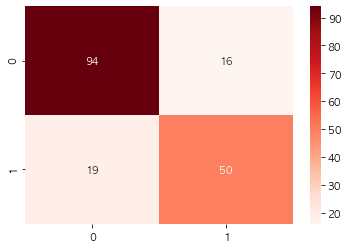

In [56]:
sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1],
            xticklabels=[0,1])
plt.show()

In [35]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

array([[0.78161857, 0.21838143],
       [0.56463892, 0.43536108],
       [0.78383731, 0.21616269],
       [0.77155968, 0.22844032],
       [0.90456764, 0.09543236],
       [0.78170104, 0.21829896],
       [0.90386036, 0.09613964],
       [0.40513866, 0.59486134],
       [0.78211304, 0.21788696],
       [0.9045506 , 0.0954494 ],
       [0.08591613, 0.91408387],
       [0.40592496, 0.59407504],
       [0.57316628, 0.42683372],
       [0.90325824, 0.09674176],
       [0.05811174, 0.94188826],
       [0.5624947 , 0.4375053 ],
       [0.9045593 , 0.0954407 ],
       [0.20631815, 0.79368185],
       [0.41062938, 0.58937062],
       [0.78211304, 0.21788696],
       [0.90454469, 0.09545531],
       [0.90454713, 0.09545287],
       [0.08026835, 0.91973165],
       [0.90453426, 0.09546574],
       [0.77938347, 0.22061653],
       [0.90520394, 0.09479606],
       [0.20568586, 0.79431414],
       [0.2083033 , 0.7916967 ],
       [0.90041411, 0.09958589],
       [0.90426758, 0.09573242],
       [0.

In [39]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [58]:
x_data = titanic[['pclass', 'sex', 'fare']]
x_data = pd.get_dummies(x_data, columns=['sex'])
x_data = x_data.drop('sex_male', axis=1)
x_data

,pclass,fare,sex_female
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0
...,...,...,...
886,2,13.0000,0
887,1,30.0000,1
888,3,23.4500,1
889,1,30.0000,0


In [59]:
y_data = titanic['survived']
y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [61]:
p = model_lr.predict_proba(x_test)
p

array([[0.78086592, 0.21913408],
       [0.56404248, 0.43595752],
       [0.78311234, 0.21688766],
       [0.7706801 , 0.2293199 ],
       [0.90397954, 0.09602046],
       [0.78094941, 0.21905059],
       [0.90326123, 0.09673877],
       [0.40648651, 0.59351349],
       [0.78136656, 0.21863344],
       [0.90396224, 0.09603776],
       [0.08670818, 0.91329182],
       [0.4072815 , 0.5927185 ],
       [0.57265775, 0.42734225],
       [0.9026497 , 0.0973503 ],
       [0.05843196, 0.94156804],
       [0.56187616, 0.43812384],
       [0.90397106, 0.09602894],
       [0.20764557, 0.79235443],
       [0.4120379 , 0.5879621 ],
       [0.78136656, 0.21863344],
       [0.90395624, 0.09604376],
       [0.90395871, 0.09604129],
       [0.08095778, 0.91904222],
       [0.90394564, 0.09605436],
       [0.77860281, 0.22139719],
       [0.90462572, 0.09537428],
       [0.20700394, 0.79299606],
       [0.20966013, 0.79033987],
       [0.89976069, 0.10023931],
       [0.9036748 , 0.0963252 ],
       [0.

In [62]:
df = pd.DataFrame([y_test]).T

In [63]:
df

,survived
232,0
54,0
277,0
385,0
75,0
...,...
593,0
517,0
443,1
116,0


In [64]:
df['proba'] = p[:,1]
df

,survived,proba
232,0,0.219134
54,0,0.435958
277,0,0.216888
385,0,0.229320
75,0,0.096020
...,...,...
593,0,0.587962
517,0,0.097428
443,1,0.790259
116,0,0.096029


In [65]:
df.sort_values(by='proba')

,survived,proba
271,1,0.095374
371,0,0.095923
411,0,0.095953
804,1,0.095963
131,0,0.095970
...,...,...
716,1,0.924261
700,1,0.924261
380,1,0.924261
311,1,0.926608


In [66]:
roc_curve(y_test, p[:,1])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00909091, 0.00909091, 0.00909091,
        0.01818182, 0.01818182, 0.01818182, 0.01818182, 0.02727273,
        0.06363636, 0.07272727, 0.07272727, 0.08181818, 0.08181818,
        0.09090909, 0.09090909, 0.1       , 0.1       , 0.10909091,
        0.13636364, 0.14545455, 0.14545455, 0.16363636, 0.16363636,
        0.18181818, 0.18181818, 0.23636364, 0.25454545, 0.26363636,
        0.28181818, 0.29090909, 0.30909091, 0.31818182, 0.31818182,
        0.33636364, 0.33636364, 0.35454545, 0.39090909, 0.4       ,
        0.42727273, 0.43636364, 0.43636364, 0.44545455, 0.44545455,
        0.46363636, 0.46363636, 0.47272727, 0.47272727, 0.52727273,
        0.52727273, 0.6       , 0.6       , 0.67272727, 0.68181818,
        0.74545455, 0.76363636, 0.8       , 0.80909091, 0.81818182,
        0.82727273, 0.87272727, 0.9       , 0.93636364, 0.94545455,
        0.98181818, 0.98181818, 1.        , 1.  

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)

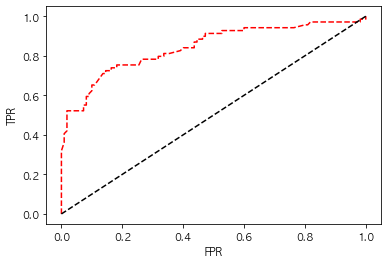

In [68]:
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()